In [1]:
!git clone https://github.com/TheAtticusProject/cuad.git

Cloning into 'cuad'...
remote: Enumerating objects: 30, done.
remote: Total 30 (delta 0), reused 0 (delta 0), pack-reused 30
Unpacking objects: 100% (30/30), done.


In [2]:
!mv cuad cuad-training

In [3]:
!unzip cuad-training/data.zip -d cuad-data/

Archive:  cuad-training/data.zip
  inflating: cuad-data/CUADv1.json   
  inflating: cuad-data/test.json     
  inflating: cuad-data/train_separate_questions.json  


In [4]:
!mkdir cuad-models

In [5]:
!curl https://zenodo.org/record/4599830/files/roberta-base.zip?download=1 --output cuad-models/roberta-base.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  426M  100  426M    0     0  9723k      0  0:00:44  0:00:44 --:--:-- 14.6M


In [6]:
!unzip cuad-models/roberta-base.zip -d cuad-models/

Archive:  cuad-models/roberta-base.zip
   creating: cuad-models/roberta-base/
  inflating: cuad-models/roberta-base/special_tokens_map.json  
  inflating: cuad-models/roberta-base/tokenizer_config.json  
  inflating: cuad-models/roberta-base/pytorch_model.bin  
  inflating: cuad-models/roberta-base/training_args.bin  
  inflating: cuad-models/roberta-base/vocab.json  
  inflating: cuad-models/roberta-base/predictions_.json  
  inflating: cuad-models/roberta-base/merges.txt  
  inflating: cuad-models/roberta-base/nbest_predictions_.json  
  inflating: cuad-models/roberta-base/null_odds_.json  
  inflating: cuad-models/roberta-base/config.json  


In [7]:
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 32.6 MB/s 
     |████████████████████████████████| 6.6 MB 58.9 MB/s 
     |████████████████████████████████| 596 kB 64.2 MB/s 
     |████████████████████████████████| 101 kB 14.7 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [9]:
from transformers import AutoModelForQuestionAnswering, AutoTokenizer
import torch

In [10]:
model = AutoModelForQuestionAnswering.from_pretrained('./cuad-models/roberta-base/')
tokenizer = AutoTokenizer.from_pretrained('./cuad-models/roberta-base/', use_fast=False)

In [11]:
import json

with open('./cuad-data/CUADv1.json') as json_file:
    data = json.load(json_file)

In [30]:
question = data['data'][0]['paragraphs'][0]['qas'][2]['question']
paragraph = ' '.join(data['data'][4]['paragraphs'][0]['context'].split()[:2000])
paragraph

"Exhibit 1 JOINT FILING AGREEMENT The undersigned hereby agree to jointly prepare and file with the applicable regulatory authorities this Schedule 13G or Schedule 13D and any future amendments thereto reporting each of the undersigned's ownership of securities of the issuer named herein, and hereby affirm that such Schedule 13G or Schedule 13D is being filed on behalf of each of the undersigned pursuant to and in accordance with the provisions of Rule 13d-1(k) under the Securities Exchange Act of 1934. The undersigned acknowledge that each shall be responsible for the timely filing of such amendments, and for the completeness and accuracy of the information concerning her or it contained therein, but shall not be responsible for the completeness and accuracy of the information concerning the other, except to the extent that she or it knows or has reason to believe that such information is inaccurate. Dated: March 27, 2020. /s/ Shelby J. Butterfield Shelby J. Butterfield BUTTERFIELD FA

In [31]:
question = data['data'][0]['paragraphs'][0]['qas'][2]['question']
question

'Highlight the parts (if any) of this contract related to "Agreement Date" that should be reviewed by a lawyer. Details: The date of the contract'

In [42]:
from google.colab import files 
uploaded = files.upload()

Saving TMP_GR-GROUP-SC-PRO_MOD-510-E.txt to TMP_GR-GROUP-SC-PRO_MOD-510-E.txt


In [43]:
with open('TMP_GR-GROUP-SC-PRO_MOD-510-E.txt') as paragraph:
    paragraph = paragraph.read()


paragraph

'\ufeffTEMPLATE FOR\n\n\t\n\n\n\n\n TRANSPORT SERVICE CONTRACT \n\n\n\n\nTemplate Code TMP_GR-GROUP-SC-PRO_MOD-510-E\nRev. 01\nDate 03/08/2021\nThis cover will be removed in the final document.\nHighlighted text in yellow describes the parts to be defined and the possible solutions to choose. \n\n\n\n\n\n\t\n       \n\n\nSede legale di San Donato Milanese \nVia Martiri di Cefalonia, 67\nCapitale Sociale Euro 2.191.384.693 i.v.\nRegistro Imprese di Milano, Codice Fiscale 00825790157 \nPartita IVA 00825790157, R.E.A. Milano n. 788744\n\nsaipem.com\n\n\n\n\nUffici:\nVia Martiri di Cefalonia, 67\n20097 San Donato Milanese \nMilano - Italia\n\n\nS. Donato Milanese\ndate                                                                                              \n\nTransport Service Contract №\n\n\n\n\n\n\n\n\n\n\n\nVAT registr. № \nVendor Code  \ntel   \ntelefax \ne-mail \n\n\nOur reference:  Transport Service Contract №    (to be quoted in any correspondence)\n\nSubject: Transport Service

In [ ]:
#encoding = tokenizer.encode_plus(text=question, text_pair=paragraph)
#inputs = encoding['input_ids']
#tokens = tokenizer.convert_ids_to_tokens(inputs)
#outputs = model(input_ids=torch.tensor([inputs]))

#start_scores = outputs.start_logits
#end_scores = outputs.end_logits

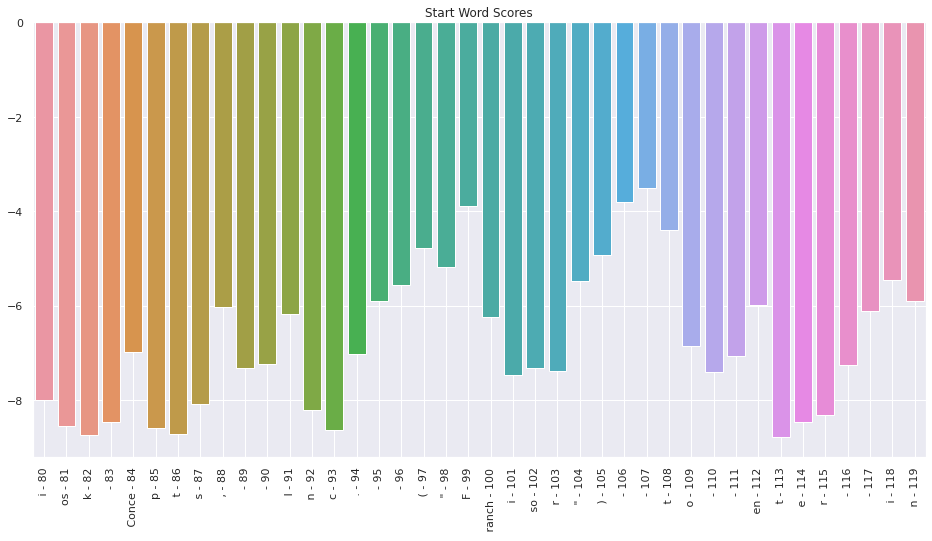

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
#sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (16,8)

# Pull the scores out of PyTorch Tensors and convert them to 1D numpy arrays.
s_scores = start_scores.detach().numpy().flatten()
e_scores = end_scores.detach().numpy().flatten()

# We'll use the tokens as the x-axis labels. In order to do that, they all need
# to be unique, so we'll add the token index to the end of each one.
token_labels = []
for (i, token) in enumerate(tokens):
    token_labels.append('{:} - {:>2}'.format(tokenizer.convert_tokens_to_string(token), i))

# Create a barplot showing the start word score for all of the tokens.
ax = sns.barplot(x=token_labels[80:120], y=s_scores[80:120], ci=None)

# Turn the xlabels vertical.
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")

# Turn on the vertical grid to help align words to scores.
ax.grid(True)

plt.title('Start Word Scores')

plt.show()


In [45]:
import torch
import time
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

from transformers import (
    AutoConfig,
    AutoModelForQuestionAnswering,
    AutoTokenizer,
    squad_convert_examples_to_features
)

from transformers.data.processors.squad import SquadResult, SquadV2Processor, SquadExample
from transformers.data.metrics.squad_metrics import compute_predictions_logits

def run_prediction(question_texts, context_text, model_path):
    ### Setting hyperparameters
    max_seq_length = 512
    doc_stride = 256
    n_best_size = 1
    max_query_length = 64
    max_answer_length = 512
    do_lower_case = False
    null_score_diff_threshold = 0.0

    # model_name_or_path = "../cuad-models/roberta-base/"

    def to_list(tensor):
        return tensor.detach().cpu().tolist()

    config_class, model_class, tokenizer_class = (
        AutoConfig, AutoModelForQuestionAnswering, AutoTokenizer)
    config = config_class.from_pretrained(model_path)
    tokenizer = tokenizer_class.from_pretrained(
        model_path, do_lower_case=True, use_fast=False)
    model = model_class.from_pretrained(model_path, config=config)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    processor = SquadV2Processor()
    examples = []

    for i, question_text in enumerate(question_texts):
        example = SquadExample(
            qas_id=str(i),
            question_text=question_text,
            context_text=context_text,
            answer_text=None,
            start_position_character=None,
            title="Predict",
            answers=None,
        )

        examples.append(example)

    features, dataset = squad_convert_examples_to_features(
        examples=examples,
        tokenizer=tokenizer,
        max_seq_length=max_seq_length,
        doc_stride=doc_stride,
        max_query_length=max_query_length,
        is_training=False,
        return_dataset="pt",
        threads=1,
    )

    eval_sampler = SequentialSampler(dataset)
    eval_dataloader = DataLoader(dataset, sampler=eval_sampler, batch_size=10)

    all_results = []

    for batch in eval_dataloader:
        model.eval()
        batch = tuple(t.to(device) for t in batch)

        with torch.no_grad():
            inputs = {
                "input_ids": batch[0],
                "attention_mask": batch[1],
                "token_type_ids": batch[2],
            }

            example_indices = batch[3]

            outputs = model(**inputs)

            for i, example_index in enumerate(example_indices):
                eval_feature = features[example_index.item()]
                unique_id = int(eval_feature.unique_id)

                output = [to_list(output[i]) for output in outputs.to_tuple()]

                start_logits, end_logits = output
                result = SquadResult(unique_id, start_logits, end_logits)
                all_results.append(result)

    final_predictions = compute_predictions_logits(
        all_examples=examples,
        all_features=features,
        all_results=all_results,
        n_best_size=n_best_size,
        max_answer_length=max_answer_length,
        do_lower_case=do_lower_case,
        output_prediction_file=None,
        output_nbest_file=None,
        output_null_log_odds_file=None,
        verbose_logging=False,
        version_2_with_negative=True,
        null_score_diff_threshold=null_score_diff_threshold,
        tokenizer=tokenizer
    )

    return final_predictions

In [46]:

import json

In [47]:
with open('./cuad-data/CUADv1.json') as json_file:
    data = json.load(json_file)

In [ ]:
#questions = []
#for i, q in enumerate(data['data'][0]['paragraphs'][0]['qas']):
#    question = data['data'][0]['paragraphs'][0]['qas'][i]['question']
#    questions.append(question)
#contract = data['data'][0]['paragraphs'][0]['context']

In [48]:
questions = []
for i, q in enumerate(data['data'][0]['paragraphs'][0]['qas']):
    question = data['data'][0]['paragraphs'][0]['qas'][i]['question']
    questions.append(question)

contract = paragraph

contract



'\ufeffTEMPLATE FOR\n\n\t\n\n\n\n\n TRANSPORT SERVICE CONTRACT \n\n\n\n\nTemplate Code TMP_GR-GROUP-SC-PRO_MOD-510-E\nRev. 01\nDate 03/08/2021\nThis cover will be removed in the final document.\nHighlighted text in yellow describes the parts to be defined and the possible solutions to choose. \n\n\n\n\n\n\t\n       \n\n\nSede legale di San Donato Milanese \nVia Martiri di Cefalonia, 67\nCapitale Sociale Euro 2.191.384.693 i.v.\nRegistro Imprese di Milano, Codice Fiscale 00825790157 \nPartita IVA 00825790157, R.E.A. Milano n. 788744\n\nsaipem.com\n\n\n\n\nUffici:\nVia Martiri di Cefalonia, 67\n20097 San Donato Milanese \nMilano - Italia\n\n\nS. Donato Milanese\ndate                                                                                              \n\nTransport Service Contract №\n\n\n\n\n\n\n\n\n\n\n\nVAT registr. № \nVendor Code  \ntel   \ntelefax \ne-mail \n\n\nOur reference:  Transport Service Contract №    (to be quoted in any correspondence)\n\nSubject: Transport Service

In [ ]:
#with open('MPLXLP_06_17_2015-EX-10.1-TRANSPORTATION SERVICES AGREEMENT.txt', 'w') as f:
#    f.write(' '.join(contract.split()))

In [49]:
predictions = run_prediction(questions, contract, 'cuad-models/roberta-base/')

add example index and unique id: 100%|██████████| 41/41 [00:00<00:00, 16544.78it/s]


In [50]:
predictions

OrderedDict([('0', 'TRANSPORT SERVICE CONTRACT'),
             ('1', ''),
             ('2', '03/08/2021'),
             ('3',
              'Such notices shall be effective as from the date of receipt thereof.'),
             ('4',
              'The EFFECTIVE DATE of the TRANSPORT SERVICE CONTRACT is DD/MM/YYYY or the earliest to occur amongst: i) five (5) days after the date indicated on TRANSPORT SERVICE CONTRACT first page; ii) the date of signature of the Letter of Acceptance by SUB-CONTRACTOR.[A1]'),
             ('5', ''),
             ('6', ''),
             ('7', ''),
             ('8', ''),
             ('9', ''),
             ('10', ''),
             ('11', ''),
             ('12', ''),
             ('13', ''),
             ('14', ''),
             ('15',
              'CONTRACTOR in its absolute and sole discretion may terminate the TRANSPORT SERVICE CONTRACT or any part thereof for any reason and at any time by giving 10 (ten) days’ notice thereof to SUB-CONTRACTOR.'),
  

In [51]:
contract

'\ufeffTEMPLATE FOR\n\n\t\n\n\n\n\n TRANSPORT SERVICE CONTRACT \n\n\n\n\nTemplate Code TMP_GR-GROUP-SC-PRO_MOD-510-E\nRev. 01\nDate 03/08/2021\nThis cover will be removed in the final document.\nHighlighted text in yellow describes the parts to be defined and the possible solutions to choose. \n\n\n\n\n\n\t\n       \n\n\nSede legale di San Donato Milanese \nVia Martiri di Cefalonia, 67\nCapitale Sociale Euro 2.191.384.693 i.v.\nRegistro Imprese di Milano, Codice Fiscale 00825790157 \nPartita IVA 00825790157, R.E.A. Milano n. 788744\n\nsaipem.com\n\n\n\n\nUffici:\nVia Martiri di Cefalonia, 67\n20097 San Donato Milanese \nMilano - Italia\n\n\nS. Donato Milanese\ndate                                                                                              \n\nTransport Service Contract №\n\n\n\n\n\n\n\n\n\n\n\nVAT registr. № \nVendor Code  \ntel   \ntelefax \ne-mail \n\n\nOur reference:  Transport Service Contract №    (to be quoted in any correspondence)\n\nSubject: Transport Service

In [52]:
with open('predictions.txt', 'w') as f:
    for i, p in enumerate(predictions):
        f.write(f"Question {i+1}: {questions[int(p)]}\nAnswer: {predictions[p]}\n\n")

In [54]:
files.download('predictions.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>